Dimensionality reduction algorithms, as their name already suggests, are used to reduce the number of features (dimensions) in the training and testing data. 
Besides obvious benefits in the speed up of the training and testing processes, one of the main advantages of dimensionality reduction algorithms is avoiding overfitting.
We will use two different dimensionality reduction algorithms, PCA and LDA, to compare their influence on the classification of German traffic signs dataset from https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign .

PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from skimage import transform
from skimage import exposure
from skimage import io
from sklearn.metrics import confusion_matrix
from PIL import Image, ImageDraw

In [2]:
#load images and data from a dataframe
def load(df):
    #images and labels
    images = []
    labels = []
    
    for index, row in df.iterrows():
        l = row['ClassId']
        img = io.imread(row['Path'])
        img = transform.resize(img, (32, 32)) #resize into 32 by 32 images
        img = exposure.equalize_adapthist(img, clip_limit=0.1)
        images.append(img.flatten())
        labels.append(int(l))
        
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

In [3]:
# read the csv files as data frames
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


We only need ClassId and Path columns (in order to read the images)

In [5]:
#training set
#retain only the ClassId and Path features
trainn = train.drop(['Width','Height','Roi.X1','Roi.Y1','Roi.X2','Roi.Y2'],axis=1)
#randomize the order of images in the training set
trainn = trainn.sample(frac=1)
trainn.head()

,ClassId,Path
27141,21,Train/21/00021_00005_00021.png
28390,24,Train/24/00024_00006_00010.png
12908,8,Train/8/00008_00025_00008.png
39013,42,Train/42/00042_00001_00014.png
8876,5,Train/5/00005_00014_00026.png


In [6]:
#testing set
#retain only the ClassId and Path columns 
testt = test.drop(['Width','Height','Roi.X1','Roi.Y1','Roi.X2','Roi.Y2'],axis=1)
#randomize the order of images in the training set (not necessary)
testt = testt.sample(frac=1)
testt.head()

,ClassId,Path
1273,2,Test/01273.png
8738,22,Test/08738.png
12439,5,Test/12439.png
10061,16,Test/10061.png
2733,12,Test/02733.png


In [7]:
#use the Path feature to read images as np.arrays
XX_train, y_train = load(trainn)
print(XX_train.shape,y_train.shape)

(39209, 3072) (39209,)


In [9]:
XX_test, y_test = load(testt)
print(XX_test.shape,y_test.shape)

(12630, 3072) (12630,)


In [10]:
#0.85 parameter means pca will return eigenvectors that have the 85% of the variation in the dataset
#I thought this was a reasonable value to maintain the features of the dataset, 
#while significantly reducing the number of features
pca = PCA(0.85)
pca.fit(XX_train)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
X_train = pca.transform(XX_train)
X_test = pca.transform(XX_test)
print(X_train.shape,X_test.shape)

(39209, 211) (12630, 211)


KNN classifier using 8 nearest neighbor

In [12]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [13]:
y_pred = knn.predict(X_test)
print("PCA Accuracy:",metrics.accuracy_score(y_test, y_pred))

PCA Accuracy: 0.6652414885193982


In [14]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(CM)

Confusion matrix
[[ 20   9   5 ...   0   0   0]
 [  6 365  65 ...   0   0   0]
 [ 10  45 353 ...   0   0   0]
 ...
 [  0   0   6 ...  25   0   0]
 [  0   0   2 ...   0  29   5]
 [  0   0   3 ...   0  13  61]]


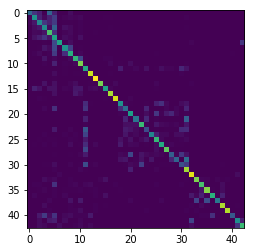

In [15]:
img = np.zeros((43,43))
for i in range(CM.shape[0]):
    img[i,:] = CM[i,:]/np.sum(CM[i,:])
imgplot = plt.imshow(img)
plt.show()

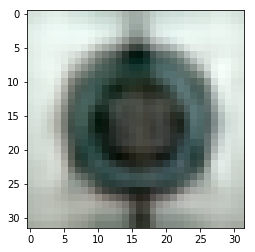

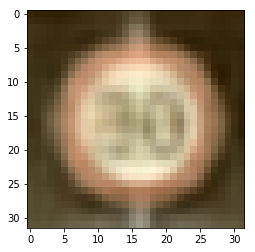

In [16]:
#normalizing function to display images
def normalize(img):
    maxi = img.max()
    mini = img.min()
    return (img - mini)/(maxi-mini)

#first and second eigenvalues
eigenv1 = pca.components_[0,:]
eigenv2 = pca.components_[1,:]

#unflatten the image
eigim1 = eigenv1.reshape((32,32,3))
imgplot = plt.imshow(normalize(eigim1))
plt.show()
#unflatten the image
eigim2 = eigenv2.reshape((32,32,3))
imgplot = plt.imshow(normalize(eigim2))
plt.show()

In [17]:
LDA

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [18]:
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [19]:
yy_pred = lda.predict(X_test)
print("LDA Accuracy:",metrics.accuracy_score(y_test, yy_pred))

LDA Accuracy: 0.8269992082343627


In [20]:
CM1 = confusion_matrix(y_test, yy_pred)
print('Confusion matrix')
print(CM1)

Confusion matrix
[[ 38   2   0 ...   0   0   0]
 [  2 528  36 ...   0   0   0]
 [  0   6 672 ...   0   0   0]
 ...
 [  0   0   0 ...  67   0   0]
 [  0   0   0 ...   0  40   0]
 [  0   0   2 ...   0  12  67]]


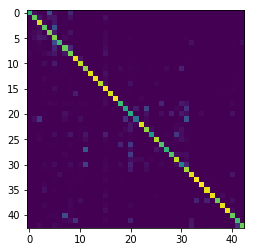

In [21]:
img = np.zeros((43,43))
for i in range(CM1.shape[0]):
    img[i,:] = CM1[i,:]/np.sum(CM1[i,:])
imgplot = plt.imshow(img)
plt.show()